In [ ]:
# ML Project
# Group 15 
# Akshat Saini - 2020019
# Nakul Thureja - 2020528
# Nishaant Rastogi - 2020091

In [ ]:
! pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from google.colab import drive
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import wfdb
from pathlib import Path
import pickle
import os
import requests
import zipfile
import gzip
import ast
import time
import numpy as np
#import wfdb
import ast
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from scipy.fftpack import fft, ifft 
from scipy import signal
import os
import pickle
from keras.models import Model, Sequential
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras import layers, optimizers, losses, metrics, regularizers, callbacks

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/ML_Project_Data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/'
sampling_rate = 100
data_folder = path

In [ ]:
Y = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [ ]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [ ]:
# Load raw signal data
if os.path.isfile('/content/drive/MyDrive/PTB-XL/X.pkl') == False:
  X = load_raw_data(Y, sampling_rate, path)
  pickle.dump(X, open('/content/drive/MyDrive/PTB-XL/X.pkl', 'wb'))
else:
  X = pickle.load(open('/content/drive/MyDrive/PTB-XL/X.pkl', 'rb'))

In [ ]:
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)


In [ ]:
agg_df = agg_df[agg_df.diagnostic == 1]


In [ ]:

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))



In [ ]:
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)


In [ ]:
Y.columns


Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'r_peaks', 'RS-LVH', 'S12-LVH', 'R56-LVH', 'QRS-LVH', 'LI-LVH',
       'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI', 'ST-DEPR-MI', 'Q-ISC',
       'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak', 'STRAIN', 'MI-ALL',
       'diagnostic_superclass'],
      dtype='object')

In [ ]:
!pip install py-ecg-detectors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43817 sha256=eb0060aa3a8588b3e119cbcf9bb4d929adbf1dca37c06f15d574237a2ff13c60
  Stored in directory: /root/.cache/pip/wheels/13/39/c2/d113611d276bf55252ed5a640e98596d7dcc96535afbf254d5
Successfully built gatspy


In [ ]:
from ecgdetectors import Detectors
detectors = Detectors(sampling_rate)

# Padding to help detect initial peaks:
r_peaks = np.array(detectors.hamilton_detector(np.hstack((np.zeros(10),X[0,:,1])))) - 10
r_peaks_wvt = np.array(detectors.swt_detector(np.hstack((np.zeros(20),X[0,:,1])))) - 20

In [ ]:
print(r_peaks)
print(r_peaks_wvt)

[ 28 120 213 306 399 490 588 685 779 867 963]
[ 19  56 112 199 297 390 484 579 675 770 861 957]


In [ ]:
Y.r_peaks

ecg_id
1            [ 22 115 208 300 393 488 583 679 773 865 961]
2                            [101 231 368 502 627 747 863]
3            [  7 104 202 298 394 485 577 670 764 857 951]
4        [ 30 108 192 279 365 447 523 601 681 763 841 9...
5            [ 33 123 219 313 399 482 571 669 764 854 938]
                               ...                        
21833    [ 22  79 135 190 245 301 357 413 468 523 579 6...
21834        [ 16 104 192 282 371 460 549 639 731 821 910]
21835                [ 76 175 274 383 491 591 688 791 894]
21836    [ 23 110 199 286 373 458 540 599 703 792 881 967]
21837            [ 68 169 269 369 470 572 674 776 877 980]
Name: r_peaks, Length: 21801, dtype: object

In [ ]:
Y.shape, X.shape
x_ = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

In [ ]:
!pip install neurokit2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.4 MB/s eta 0:00:00


In [ ]:
import neurokit2 as nk
u, rpeaks = nk.ecg_peaks(X[0,:,1], sampling_rate=sampling_rate)
print(rpeaks)

{'ECG_R_Peaks': array([115, 208, 300, 393, 487, 583, 679, 773, 864, 961]), 'sampling_rate': 100}


In [ ]:

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import neurokit2 as nk
from ecgdetectors import Detectors

import sys

def advanced_interactive_signal_plot(idxs: np.array, X: np.array, Y: pd.DataFrame, sampling_rate: int, channels = np.arange(12, dtype = np.int32), rpeak_style = 'nk') -> None:
  """
  Takes a 2D numpy array with the ECG signal of one subject,
  and plots these in interactive figures. Adds the estimated 
  R-peaks using the neurokit2 package on top.

  Inputs:
  - idx: 1D np array or list of indices to subset from X
  - X: 3D numpy array of shape (.,., 12)
  - Y: corresponding metadata dataframe
  - sampling_rate: the sampling rate, to determine the X-axis units
  - channels: list of ints, the indices of the channels to be displayed
  - rpeak_style: string, style of rpeak extractor to use. Options: 'nk', 
  """
  channel_names = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

  colors = px.colors.qualitative.Dark24
  print("---------------------------------------------------------------------")
  for s_idx in idxs: # subject_index:
    X_subject = X[s_idx, :, :]
    scp_code = Y.scp_codes.iloc[s_idx]
    ecg_id = Y.index[s_idx]

    heart_rates = {}

    fig = go.Figure()
    for n_idx, idx in enumerate(channels):
      fig.add_trace(go.Scatter(x = np.arange(X_subject.shape[0]) / sampling_rate, y = X_subject[:,idx] + 2. * (len(channels) - n_idx), name = channel_names[idx], marker_color = colors[idx]))
      fig.add_trace(go.Scatter(x = np.arange(X_subject.shape[0]) / sampling_rate, y = np.zeros(X_subject.shape[0]) + 2. * (len(channels) - n_idx), marker_color = 'black', line = dict(width = 1.),  showlegend = False))
      
      # Estimate R-peaks:
      if rpeak_style == 'nk':
        _, rpeaks = nk.ecg_peaks(X_subject[:,idx], sampling_rate=sampling_rate)
        rpeaks = rpeaks['ECG_R_Peaks'].astype('float') / sampling_rate
      elif rpeak_style == 'hamilton':
        detectors = Detectors(sampling_rate)
        rpeaks = (np.array(detectors.hamilton_detector(X_subject[:,idx]))).astype('float')  / sampling_rate # np.hstack((np.zeros(10),
      elif rpeak_style == 'wvt':
        detectors = Detectors(sampling_rate)
        rpeaks = np.array(detectors.swt_detector(X_subject[:,idx])).astype('float') / sampling_rate
      else:
        sys.exit('Incorrect rpeak_style. Options: "nk", "hamilton", "wvt".')

      heart_rates[channel_names[idx]] = (rpeaks.shape[0] - 1) * sampling_rate / (rpeaks[-1] - rpeaks[0]) 

      for r in rpeaks:
        fig.add_trace(go.Scatter(x = r * np.ones(20), y = np.linspace(-1, 1, num = 20) + 2. * (len(channels) - n_idx), line = dict(color = 'grey'), showlegend = False))
    
    fig.update_layout(title = f'ECG id: {ecg_id}, scp: {scp_code} - R-peaks: grey', yaxis = dict(showticklabels=False))
    fig.show()
    # display(pd.Series(heart_rates, name = 'heart_rates'))
    print("---------------------------------------------------------------------")

advanced_interactive_signal_plot([0,1], X, Y, sampling_rate, rpeak_style = 'nk')

---------------------------------------------------------------------


---------------------------------------------------------------------


---------------------------------------------------------------------


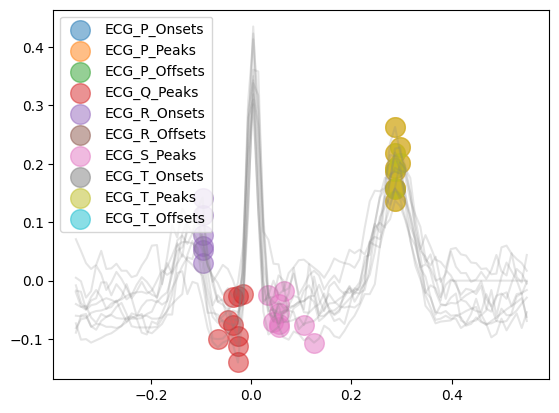

In [ ]:
ecg_signal = X[0,:,1]

_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate)

signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal.copy(), 
                                         rpeaks, 
                                         sampling_rate=sampling_rate, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='all')

In [ ]:
# It failed in giving the onsets, but gave the peaks at least
waves_cwt

{'ECG_P_Onsets': [nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'ECG_P_Peaks': [143, 236, 328, 422, 515, 611, 707, 802, 892],
 'ECG_P_Offsets': [nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'ECG_Q_Peaks': [112, 204, 297, 389, 485, 580, 672, 770, 859, nan],
 'ECG_R_Onsets': [nan, nan, 290, nan, 477, nan, 669, 763, 854, 951],
 'ECG_R_Offsets': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'ECG_S_Peaks': [127, 218, 303, 399, 492, 588, 684, 777, 869, nan],
 'ECG_T_Onsets': [nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'ECG_T_Peaks': [143, 236, 328, 422, 515, 611, 707, 802, 892],
 'ECG_T_Offsets': [nan, nan, nan, nan, nan, nan, nan, nan, nan]}

{'ECG_P_Peaks': [100, 195, 290, 381, 477, 570, 667, 762, 854, nan],
 'ECG_Q_Peaks': [111, 204, 298, 389, 483, 580, 675, 769, 861, nan],
 'ECG_S_Peaks': [121, 211, 304, 400, 492, 588, 692, 777, 869, nan],
 'ECG_T_Peaks': [143, 235, 328, 422, 515, 611, 707, 802, 892, nan],
 'ECG_P_Onsets': [95, 191, 287, 376, 473, 567, 665, 759, 849, nan],
 'ECG_T_Offsets': [148, 243, 333, 431, 531, 619, 714, 815, 898, nan]}

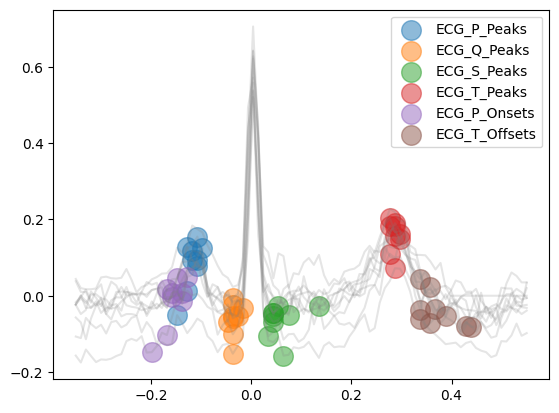

In [ ]:
ecg_signal = X[0,:,0]

_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate)

signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=sampling_rate, 
                                         method="peaks", 
                                         show=True, 
                                         show_type='all')

display(waves_cwt)  

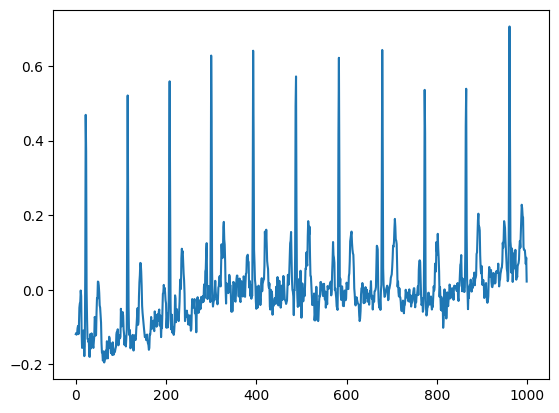

In [ ]:
plt.plot(X[0][:,0])
plt.show()

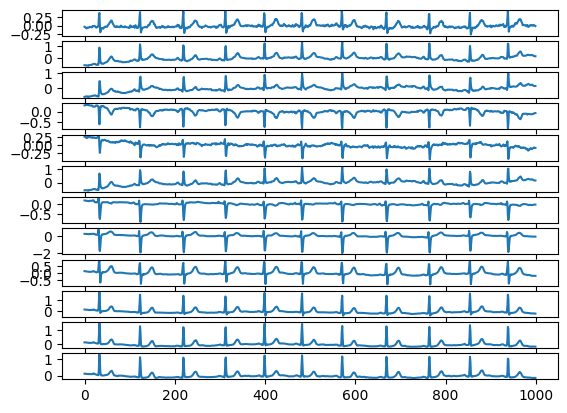

In [ ]:
ecg = X[4]
plt.figure()
for index in range(12):
    plt.subplot(12,1,index+1)
    plt.plot(ecg[:,index])
plt.show()


In [ ]:
y = Y.diagnostic_superclass

In [ ]:
num2class = np.array(['NORM', 'MI', 'STTC', 'CD', 'HYP'])

In [ ]:
np.where(num2class == y.iloc[0][0])[0][0]

0

In [ ]:
!pip install hrv-analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hrvanalysis import *
import warnings
import neurokit2 as nk

warnings.filterwarnings("ignore")
y_dict = {}
x_dict = {}
X_new = pd.DataFrame()
y_new = []
for index in range(len(y)):
    try:
        rri = np.diff(nk.ecg_process(X[index][:,0], sampling_rate)[1]['ECG_R_Peaks']) / 1000
        time_domain_features = get_time_domain_features(rri)
        frequency_domain_features = get_frequency_domain_features(rri)
        time_domain_features.update(frequency_domain_features)
        x_dict[index] = time_domain_features
        y_dict[index] = np.where(num2class == y.iloc[index][0])[0][0]    
        X_new = X_new.append(x_dict[index], ignore_index=True)
        y_new.append(y_dict[index])
        if index%1000 == 0:
          print(index)     
    except:
        continue;

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000


In [ ]:
X_new.shape

(21393, 23)

In [ ]:
y_new = np.asarray(y_new)
y_new.shape

(21393,)

In [ ]:
np.save('X_new.npy', X_new)
np.save('y_new.npy', y_new)


In [ ]:
X_new = pickle.load(open('/content/drive/MyDrive/X_new.pkl', 'rb'))
y_new = pickle.load(open('/content/drive/MyDrive/X_new.pkl', 'rb'))
